Import important modules

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = "2"
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

Creating data

In [3]:
input_list = np.random.randint(0, 1000000, (50000, 2))

input_list = np.random.randint(0, 1000000, (50000, 2))

output_list = input_list[:, 0] + input_list[:, 1]

# reshape the result array to a column vector
output_list = output_list.reshape(-1, 1)

Splitting data into training and testing

In [4]:
input_list_train, input_list_test, output_list_train, output_list_test = train_test_split(input_list, output_list, test_size=0.2)

Defining keras model

In [34]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation='linear', input_shape=(2,)),
    tf.keras.layers.Dense(1)
])

Compiling the model

In [39]:
model.compile(optimizer='adam', loss='mean_squared_error')

Training the model

In [40]:
fitValues = model.fit(input_list, output_list, epochs=600, batch_size=4000)

Epoch 1/600
13/13 [==============================] - 1s 8ms/step - loss: 3292445.7500
Epoch 2/600
13/13 [==============================] - 0s 8ms/step - loss: 722918.6875
Epoch 3/600
13/13 [==============================] - 0s 8ms/step - loss: 228774.3594
Epoch 4/600
13/13 [==============================] - 0s 8ms/step - loss: 54343.3516
Epoch 5/600
13/13 [==============================] - 0s 8ms/step - loss: 16993.6270
Epoch 6/600
13/13 [==============================] - 0s 8ms/step - loss: 3558.5764
Epoch 7/600
13/13 [==============================] - 0s 9ms/step - loss: 1007.2755
Epoch 8/600
13/13 [==============================] - 0s 8ms/step - loss: 290.4251
Epoch 9/600
13/13 [==============================] - 0s 7ms/step - loss: 75.5108
Epoch 10/600
13/13 [==============================] - 0s 8ms/step - loss: 18.6078
Epoch 11/600
13/13 [==============================] - 0s 8ms/step - loss: 5.3244
Epoch 12/600
13/13 [==============================] - 0s 9ms/step - loss: 1.7513
Epo

Create a plot from the training losses x epoch

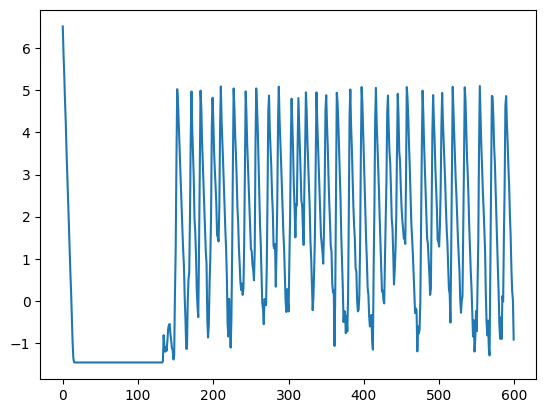

[3292445.75, 722918.6875, 228774.359375, 54343.3515625, 16993.626953125, 3558.576416015625, 1007.2754516601562, 290.42510986328125, 75.51078796386719, 18.607759475708008, 5.324357986450195, 1.7513402700424194, 0.40392735600471497, 0.11305686831474304, 0.04425187036395073, 0.03456348180770874, 0.03431122750043869, 0.03422040864825249, 0.03422040864825249, 0.03422040864825249, 0.03422040864825249, 0.03422040492296219, 0.03422040492296219, 0.03422040119767189, 0.03422040492296219, 0.03422040492296219, 0.03422040492296219, 0.03422040492296219, 0.034220367670059204, 0.03422035276889801, 0.03422035276889801, 0.03422035276889801, 0.03422034904360771, 0.03422035276889801, 0.03422035276889801, 0.03422035276889801, 0.03422034904360771, 0.03422034904360771, 0.03422034531831741, 0.03422034531831741, 0.034220341593027115, 0.03422034531831741, 0.03422034531831741, 0.03422034531831741, 0.03422034531831741, 0.03422034531831741, 0.03422034531831741, 0.03422034531831741, 0.03422034531831741, 0.034220345

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import math

y = [math.log(i, 10) for i in list(fitValues.history["loss"])]
x = [i for i in range(len(list(y)))]

fig, ax = plt.subplots()
ax.plot(x, y)
plt.show()
print(fitValues.history["loss"])


Making predictions with our new model

In [41]:
new_input = np.array([[80, 70], [50, 30], [90, 100]])
predictions = model.predict(new_input)
print("{:<10s}{:<15s}{}".format(" ", "prediction", "actual"))
for i in range(len(predictions)):
    x, y = new_input[i]
    predicted_val = predictions[i][0]
    actual_val = x + y
    print("{:<10s}{:<15s}{}".format(str(x) + "+" + str(y) + ":", str(predicted_val), str(actual_val)))

1/1 [==============================] - 0s 45ms/step
          prediction     actual
80+70:    150.44371      150
50+30:    80.44374       80
90+100:   190.4437       190


Evaluating the Ultimate AI that we just made!!!!!

In [15]:
loss = model.evaluate(input_list_test, output_list_test)
score = 1 / (1 + loss)  # Convert the loss to a score
print("score:" + str(score))

313/313 [==============================] - 0s 1ms/step - loss: 0.5240
score:0.656171165972247


Check if this model is already exported, if not export it

In [32]:
import pickle
import os
import pathlib

oneUp = pathlib.Path(os.path.dirname(os.path.dirname(os.path.abspath('__file__'))))
print("oneUp:", oneUp)

preModels = pathlib.Path(oneUp.joinpath('preTrainedModels'))
preModels.mkdir(parents=True, exist_ok=True) #If preModels dosent exist, create it
print("preModels:", preModels)

pkFile = oneUp.joinpath(preModels).joinpath("NN-Sum.pkl")
pkFile = pathlib.Path(preModels.joinpath("NN-Sum.pkl"))
print("pkFile", pkFile)

with pkFile.open('w+b') as f:
    pickle.dump(model, f)

oneUp: /home/martin/Desktop/simplePythonAI
preModels: /home/martin/Desktop/simplePythonAI/preTrainedModels
pkFile /home/martin/Desktop/simplePythonAI/preTrainedModels/NN-Sum.pkl


In [33]:
with open(pkFile, "rb") as f:
    data = pickle.load(f)
    print("data type"+str(type(data)))
    numbers = np.array([[15, 15]])
    prediction = data.predict(numbers)
    print(prediction)

data type<class 'keras.engine.sequential.Sequential'>
1/1 [==============================] - 0s 44ms/step
[[31.924618]]
